In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
data_df = pd.read_csv("main-data\data.csv")

### Merging the Data:

In [3]:
yield_df = pd.read_csv("main-data\wheat_yield_data.csv")
yield_column = yield_df[['Yield_ton_per_HA']]

In [4]:
data_df = data_df.iloc[:len(yield_column)]  # truncate if needed
data_df = data_df.reset_index(drop=True)
yield_column = yield_column.reset_index(drop=True)

In [5]:
data_df['Yield_ton_per_HA'] = yield_column

In [7]:
data_df.head()

,Region,Nitrogen_N_mg/kg,Phosphorus_P_mg/kg,Potassium_K_mg/kg,Temperature_C,Humidity_%,Rainfall_mm,Soil_Moisture_%,LDR,Yield_ton_per_HA
0,Punjab,750.965158,28.193154,191.991431,24.48,53.64,3.09,27.844360,365.137699,0.801353
1,Punjab,784.305016,27.764688,254.701099,21.31,53.20,16.07,34.519483,405.474674,0.822160
2,Punjab,794.938568,15.758590,149.447401,25.24,33.07,4.60,26.836535,395.051534,0.817997
3,Punjab,992.682541,32.693723,182.747921,29.62,55.05,23.10,35.164865,401.877272,0.830346
4,Punjab,686.475356,8.605565,201.999587,20.83,70.99,40.76,24.459244,310.713560,0.829249


### Splitting Data for Training:

In [6]:
features = [
    'Nitrogen_N_mg/kg', 'Phosphorus_P_mg/kg', 'Potassium_K_mg/kg',
    'Temperature_C', 'Humidity_%', 'Rainfall_mm', 'Soil_Moisture_%'
]
target = 'Yield_ton_per_HA'

In [7]:
X = data_df[features]
y = data_df[target]

### Training Model:

In [8]:
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

RandomForestRegressor(random_state=42)

In [9]:
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

### Visualizing the results:

**Feeature Importance:**

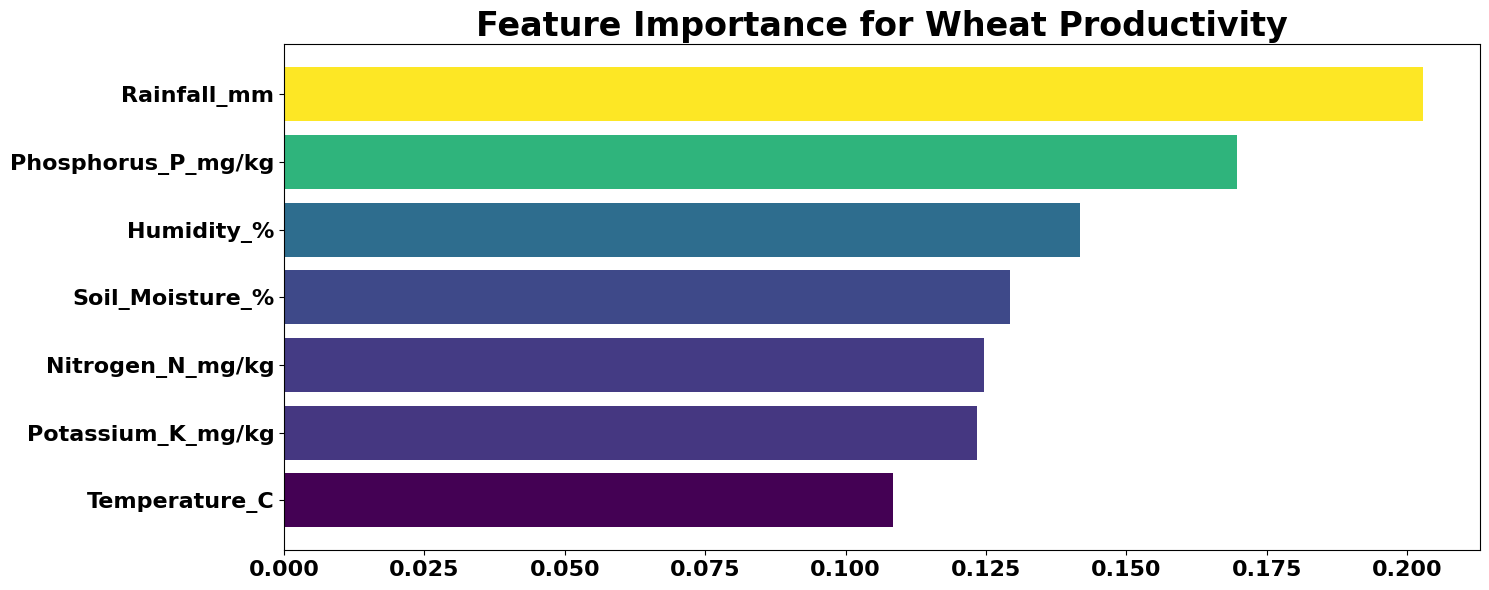

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

norm = plt.Normalize(feature_importance_df['Importance'].min(), feature_importance_df['Importance'].max())
colors = cm.viridis(norm(feature_importance_df['Importance']))

plt.figure(figsize=(15, 6))
plt.barh(
    feature_importance_df['Feature'],
    feature_importance_df['Importance'],
    color=colors
)

plt.title('Feature Importance for Wheat Productivity', fontsize=24, fontweight='bold')
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [12]:
data_df = pd.read_csv("main-data\data.csv")
yield_df = pd.read_csv("main-data\wheat_yield_data.csv")

data_df['Year'] = range(1960, 1960 + len(data_df))
merged_df = data_df.merge(yield_df[['Year', 'Yield_ton_per_HA']], on='Year', how='left')

X = merged_df.drop(columns=['Region', 'LDR', 'Year', 'Yield_ton_per_HA'])
y = merged_df['Yield_ton_per_HA']

**Correlation Heatmap:**

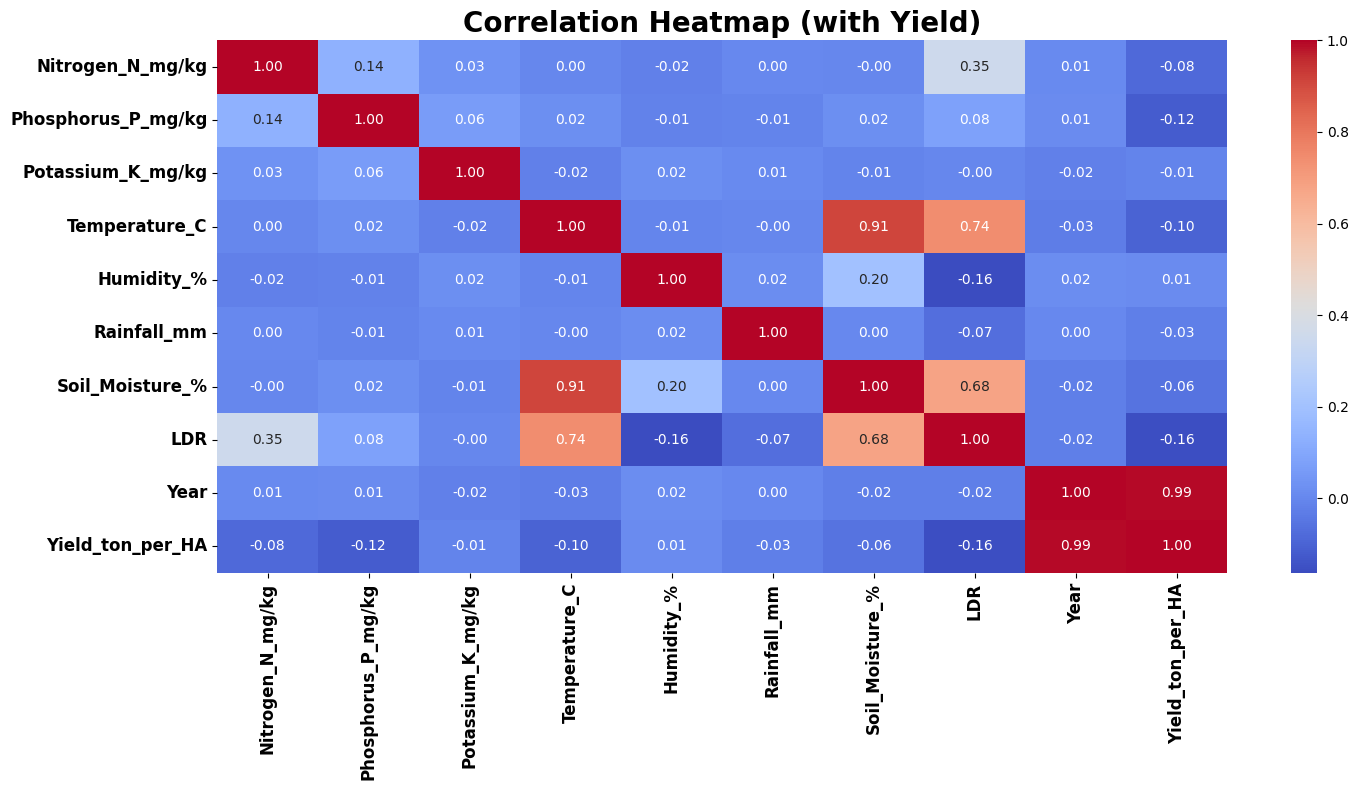

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.heatmap(
    merged_df.corr(numeric_only=True),
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)

# Title and tick label styling
plt.title("Correlation Heatmap (with Yield)", fontsize=20, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


**PCA Visual:**

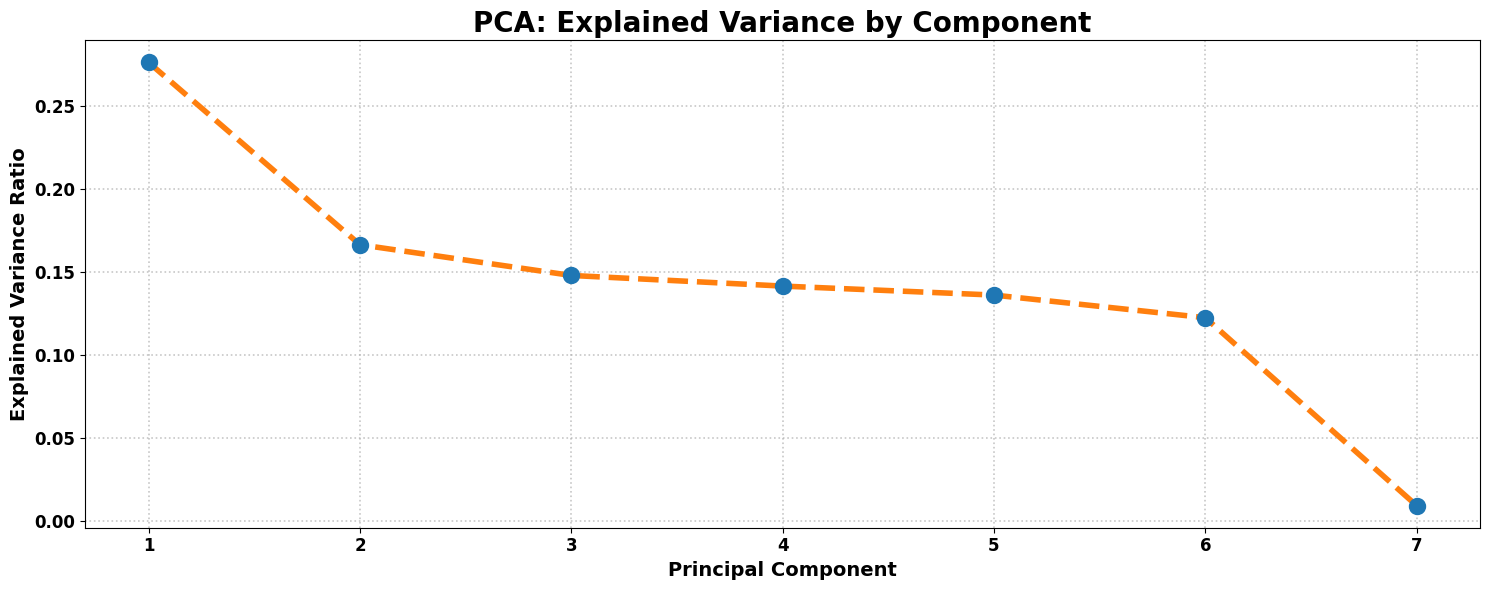

In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)

plt.figure(figsize=(15, 6))
plt.plot(
    range(1, len(pca.explained_variance_ratio_) + 1),
    pca.explained_variance_ratio_,
    marker='o',
    linestyle='--',
    color='#ff7f0e',            # vibrant orange line
    linewidth=4,                # bolder line
    markersize=10,              # larger markers
    markerfacecolor='#1f77b4',  # deep blue inside marker
    markeredgewidth=2.5,        # bold marker border
    markeredgecolor='#1f77b4'   # match marker edge color
)

plt.title("PCA: Explained Variance by Component", fontsize=20, fontweight='bold')
plt.xlabel("Principal Component", fontsize=14, fontweight='bold')
plt.ylabel("Explained Variance Ratio", fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.grid(True, linestyle=':', linewidth=1.2, alpha=0.7)
plt.tight_layout()
plt.show()

**Pairplot:**

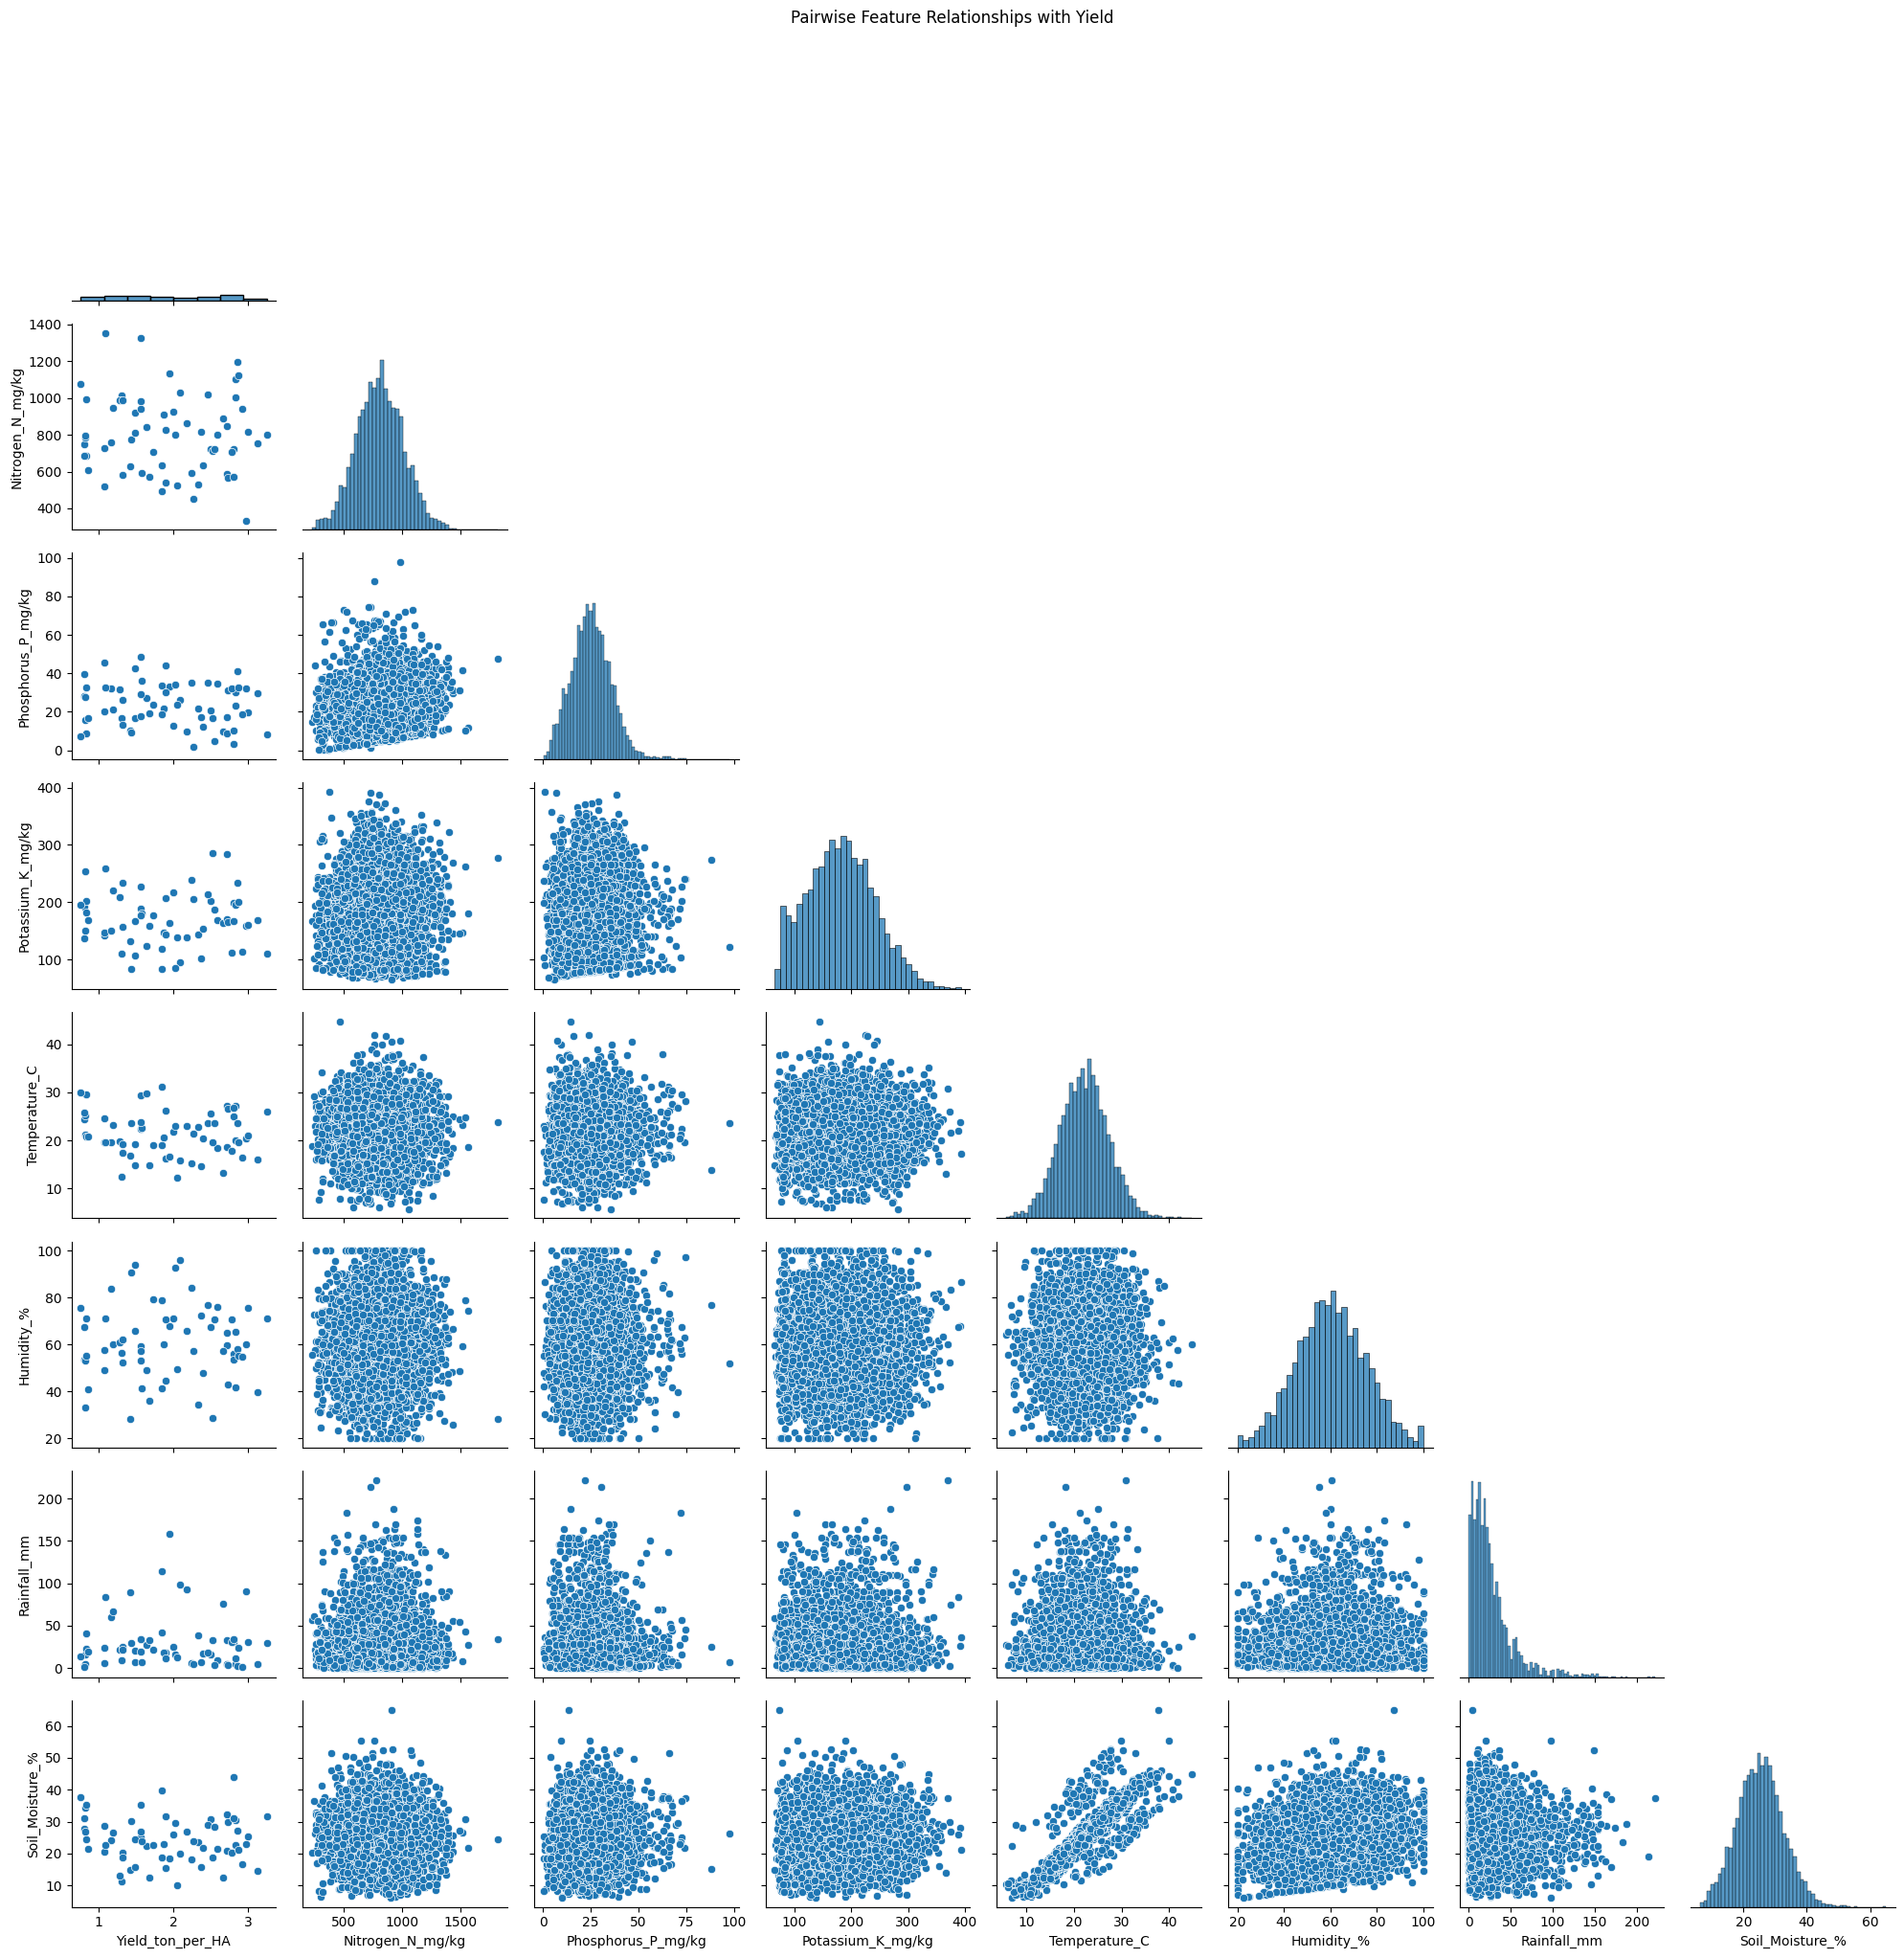

In [17]:
sns.pairplot(merged_df[['Yield_ton_per_HA'] + list(X.columns)], corner=True)
plt.suptitle("Pairwise Feature Relationships with Yield", y=1.02)
plt.tight_layout()
plt.show()